In [13]:
# Adapted from the code on https://www.tensorflow.org/tutorials/images/cnn 
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

from tensorflow.keras import datasets, layers, models, regularizers

In [14]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

1- Multi Layer Perceptron (MLP). Modify the provided script 'perceptron.py' to build a MLP. Use architectures 
with 0, 1 and 2 hidden layers. Keep the complexity of the model bounded so runs do not take much more
than 1 hour to reach the maximum of testing accuracy. Notice that the input needs to be "flattened" since there is no spatial structure 
in this fully connected design.  This can be achieved by adding a dummy layer with no free parameters with "layers.Flatten()"
as the first layer in the constructor "model.Sequential()". Obtain the learning curves and discuss the results.
Report the optimizer in use, initialization parameters, the learning rate, etc. Is early stopping convenient
in this model?

YOUR ANWSER HERE: 

* item Optimizer: Adam 
* item Initialization parameters: Epochs = 50
* item Learning rate: Defaults to 0.001, this learning rate however is tweaked by the adam optimizer.
* Is early stopping convenientin this model?: 
In the case of this model we could say that early stopping could be useful since we don't really learn any information with 0 layers. As can be seen in the results we also dont see any major improvements.
* Discuss result: In this model there is no hidden layer to learn on. The final dense layer is the only layer that can influence the result, so it isn't weird to see that the  results here are quite bad.


In [ ]:
# Original
model1 = models.Sequential([
    layers.Flatten(),
    layers.Dense(10, activation='softmax') # end with softmax for classification
])

In [ ]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history1 = model1.fit(train_images, train_labels, epochs=50,
                    validation_data=(test_images, test_labels))

test_loss1, test_acc1 = model1.evaluate(test_images, test_labels)

Epoch 1/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.9633 - accuracy: 0.3154 - val_loss: 1.9403 - val_accuracy: 0.3495
Epoch 2/50
1563/1563 [==============================] - 2s 2ms/step - loss: 1.8807 - accuracy: 0.3516 - val_loss: 1.9325 - val_accuracy: 0.3309
Epoch 3/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.8549 - accuracy: 0.3633 - val_loss: 2.0048 - val_accuracy: 0.3578
Epoch 4/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.8515 - accuracy: 0.3685 - val_loss: 1.9024 - val_accuracy: 0.3535
Epoch 5/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.8280 - accuracy: 0.3735 - val_loss: 1.8070 - val_accuracy: 0.3724
Epoch 6/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.8183 - accuracy: 0.3788 - val_loss: 1.9229 - val_accuracy: 0.3435
Epoch 7/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8233 - accuracy: 0.3765 - val_loss: 1.8950 - val_accuracy:

YOUR ANWSER HERE: 

* item Optimizer: Adam 
* item Initialization parameters: Epochs = 50
* item Learning rate: Defaults to 0.001, this learning rate however is tweaked by the adam optimizer.
* Is early stopping convenientin this model?: 
In this example we can see that the model gets stuck on around 0.47-0.48.  We could say that theoratically the model could improve further but it shows no sign of improving drastically, so early stopping could be  usefull.
* Discuss result: We can already see  the difference with this model with one hidden layer and  the model with 0 hidden layers. with this extra layer and no reguralization we alrady get a ~ 12% higher val_accuracy.


In [ ]:
# TODO: Do this with 0,1,2 Hidden layers
model2 = models.Sequential([
    layers.Flatten(), # Input layer doesn't count
    layers.Dense(512, activation='relu'), # 1 Hidden layer
    layers.Dense(10, activation='softmax') # end with softmax for classification also the final layer isn't part of a hidden layer
])

In [ ]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history2 = model2.fit(train_images, train_labels, epochs=50,
                    validation_data=(test_images, test_labels))

test_loss2, test_acc2 = model2.evaluate(test_images, test_labels)

Epoch 1/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.8858 - accuracy: 0.3276 - val_loss: 1.7161 - val_accuracy: 0.3785
Epoch 2/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.7052 - accuracy: 0.3891 - val_loss: 1.6681 - val_accuracy: 0.4013
Epoch 3/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6402 - accuracy: 0.4179 - val_loss: 1.6043 - val_accuracy: 0.4310
Epoch 4/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5904 - accuracy: 0.4363 - val_loss: 1.5902 - val_accuracy: 0.4298
Epoch 5/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5622 - accuracy: 0.4455 - val_loss: 1.5727 - val_accuracy: 0.4370
Epoch 6/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5382 - accuracy: 0.4551 - val_loss: 1.5379 - val_accuracy: 0.4570
Epoch 7/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5164 - accuracy: 0.4613 - val_loss: 1.5500 - val_ac

YOUR ANWSER HERE: 

* item Optimizer: Adam 
* item Initialization parameters: Epochs = 50
* item Learning rate: Defaults to 0.001, this learning rate however is tweaked by the adam optimizer.
* Is early stopping convenientin this model?: 
In the results we can see that after  around epoch 35 we don't really improve anymore on the val_acc and val_loss.  we do however keep slightly improving on the test_acc and test_loss. this is however not desirable since it could result that overfits. So early stopping could be usefull here.
* Discuss result: There isn't much difference between this model and the earlier one with one less hidden layer. we can see that the val_acc is ~ 3% higher, but the biggest noticable difference is between the normal acc which is arround ~ 7% higher. There is a possibility that we need to add reguralization so that we can better learn unseen data  to improve the more important metric of val_acc, or the models will only slightly improve until more hidden layers make it such that the data from test is perfectly learned and we get overfitting. 


In [ ]:
model3 = models.Sequential([
    layers.Flatten(), # Input layer doesn't count
    layers.Dense(512, activation='relu'), # Hidden layer 1
    layers.Dense(256, activation='relu'), # Hidden layer 2
    layers.Dense(10, activation='softmax') # end with softmax for classification also the final layer isn't part of a hidden layer
])

In [ ]:
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history3 = model3.fit(train_images, train_labels, epochs=50,
                    validation_data=(test_images, test_labels))

test_loss3, test_acc3 = model3.evaluate(test_images, test_labels)

Epoch 1/50
1563/1563 [==============================] - 14s 8ms/step - loss: 1.8565 - accuracy: 0.3307 - val_loss: 1.7119 - val_accuracy: 0.3808
Epoch 2/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6696 - accuracy: 0.4035 - val_loss: 1.6338 - val_accuracy: 0.4186
Epoch 3/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5896 - accuracy: 0.4336 - val_loss: 1.5865 - val_accuracy: 0.4352
Epoch 4/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5400 - accuracy: 0.4492 - val_loss: 1.5165 - val_accuracy: 0.4566
Epoch 5/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5016 - accuracy: 0.4627 - val_loss: 1.5279 - val_accuracy: 0.4545
Epoch 6/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.4734 - accuracy: 0.4741 - val_loss: 1.4916 - val_accuracy: 0.4682
Epoch 7/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4389 - accuracy: 0.4849 - val_loss: 1.5019 - val_ac

2- Reuse the code from part 1 to build and run a MLP with one hidden layer as big a you can. 
Compare the performance of your design with the results appearing in Table 1 of [https://arxiv.org/pdf/1611.03530.pdf] for a MLP of 512 units in a single 
hidden layer. Report the best result found for a maximum of 1000 epochs or 2 hrs CPU running time.
The best accuracy amongst all teams will be awarded extra points.

YOUR ANWSER HERE: 

* item Optimizer: Adam 
* item Initialization parameters: Epochs = 1000
* item Learning rate: Defaults to 0.001, this learning rate however is tweaked by the adam optimizer.
* Is early stopping convenientin this model?: We set a patience of 100, such that if the validation loss doesn't improve in 100 epochs we do an early stop.
* Discuss result: After experimenting with different setups, we came to the conclusion that our best results lie around ~ 55% accuracy on the validation set(This was done in an earlier experiment, not the one shown below). The accuracy on the test set is of course way higher, but irrelevant.


In [20]:
# Add dropout, batchnorm?, minibatches?, regurilazation and data augment!
# Won't add data augment because other models didn't have that as well.

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

model_big = models.Sequential([
    layers.Flatten(), # Input layer doesn't count
    layers.Dropout(0.2),
    layers.Dense(1024, activation="relu", kernel_initializer='he_uniform'), # 1 Hidden layer
    # layers.BatchNormalization(),
    layers.Dense(10, activation='softmax') # end with softmax for classification also the final layer isn't part of a hidden layer
])

In [21]:
model_big.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
history_big = model_big.fit(train_images, train_labels, batch_size=512, epochs=1000, callbacks=[callback],
                    validation_data=(test_images, test_labels))

test_loss_big, test_acc_big = model_big.evaluate(test_images, test_labels)

Epoch 1/1000
98/98 [==============================] - 15s 150ms/step - loss: 2.6557 - accuracy: 0.2363 - val_loss: 1.9355 - val_accuracy: 0.3194
Epoch 2/1000
98/98 [==============================] - 14s 147ms/step - loss: 1.8901 - accuracy: 0.3297 - val_loss: 1.8243 - val_accuracy: 0.3577
Epoch 3/1000
98/98 [==============================] - 14s 148ms/step - loss: 1.8158 - accuracy: 0.3603 - val_loss: 1.7815 - val_accuracy: 0.3649
Epoch 4/1000
98/98 [==============================] - 15s 149ms/step - loss: 1.7632 - accuracy: 0.3777 - val_loss: 1.7126 - val_accuracy: 0.4001
Epoch 5/1000
98/98 [==============================] - 15s 149ms/step - loss: 1.7148 - accuracy: 0.3969 - val_loss: 1.6981 - val_accuracy: 0.4029
Epoch 6/1000
98/98 [==============================] - 15s 149ms/step - loss: 1.6829 - accuracy: 0.4074 - val_loss: 1.6424 - val_accuracy: 0.4192
Epoch 7/1000
98/98 [==============================] - 15s 149ms/step - loss: 1.6478 - accuracy: 0.4246 - val_loss: 1.6158 - val_ac

In [23]:
maxAcc = np.amax(history_big.history['accuracy'])
print('Max element from accuracy : ', maxAcc)

maxVal_Acc = np.amax(history_big.history['val_accuracy'])
print('Max element from validation accuracy : ', maxVal_Acc)

Max element from accuracy :  0.6045399904251099
Max element from validation accuracy :  0.5299999713897705


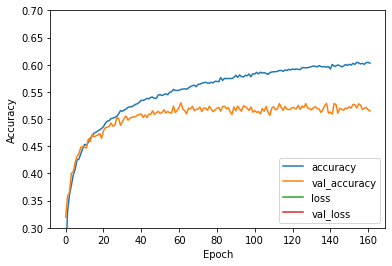

In [24]:
plt.plot(history_big.history['accuracy'], label='accuracy')
plt.plot(history_big.history['val_accuracy'], label = 'val_accuracy')
plt.plot(history_big.history['loss'], label='loss')
plt.plot(history_big.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 0.7])
plt.legend(loc='lower right')

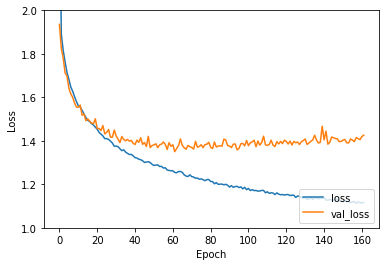

In [25]:
plt.plot(history_big.history['loss'], label='loss')
plt.plot(history_big.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([1, 2])
plt.legend(loc='lower right')

Epoch 1/1000
98/98 [==============================] - 16s 153ms/step - loss: 2.5478 - accuracy: 0.2293 - val_loss: 1.9099 - val_accuracy: 0.3146
Epoch 2/1000
98/98 [==============================] - 15s 150ms/step - loss: 1.8804 - accuracy: 0.3280 - val_loss: 1.8139 - val_accuracy: 0.3498
Epoch 3/1000
98/98 [==============================] - 15s 151ms/step - loss: 1.8098 - accuracy: 0.3543 - val_loss: 1.7622 - val_accuracy: 0.3695
Epoch 4/1000
98/98 [==============================] - 15s 151ms/step - loss: 1.7647 - accuracy: 0.3723 - val_loss: 1.7057 - val_accuracy: 0.4004
Epoch 5/1000
98/98 [==============================] - 15s 151ms/step - loss: 1.7371 - accuracy: 0.3823 - val_loss: 1.6795 - val_accuracy: 0.4089
Epoch 6/1000
98/98 [==============================] - 15s 151ms/step - loss: 1.7056 - accuracy: 0.3959 - val_loss: 1.6539 - val_accuracy: 0.4159
Epoch 7/1000
98/98 [==============================] - 15s 151ms/step - loss: 1.6856 - accuracy: 0.4022 - val_loss: 1.6200 - val_ac

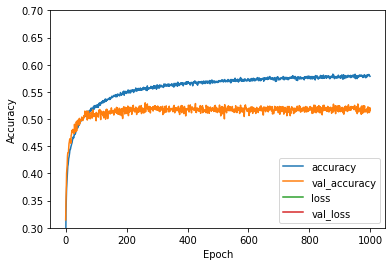

In [27]:
# Add dropout, batchnorm?, minibatches?, regurilazation and data augment!
# Won't add data augment because other models didn't have that as well.

# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=200)

model_big_overfit = models.Sequential([
    layers.Flatten(), # Input layer doesn't count
    layers.Dropout(0.4),
    layers.Dense(1024, activation="relu", kernel_initializer='he_uniform'), # 1 Hidden layer
    # layers.BatchNormalization(),
    layers.Dense(10, activation='softmax') # end with softmax for classification also the final layer isn't part of a hidden layer
])

model_big_overfit.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_big_overfit = model_big_overfit.fit(train_images, train_labels, batch_size=512, epochs=1000,
                    validation_data=(test_images, test_labels))

test_loss_big, test_acc_big = model_big_overfit.evaluate(test_images, test_labels)

plt.plot(history_big_overfit.history['accuracy'], label='accuracy')
plt.plot(history_big_overfit.history['val_accuracy'], label = 'val_accuracy')
plt.plot(history_big_overfit.history['loss'], label='loss')
plt.plot(history_big_overfit.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 0.7])
plt.legend(loc='lower right')